# Data exploration Analysis 

The dataset we will be analysing is photo-based. Therefore the number of numerical analysis we can perform is limited.

DATA EXPLORATION
- Distribución de clases
- Distribucion de caracteristicas
	- Hombre/ Mujer -> Todo -> Manual
	- Tos
	- Inhalador
	- Agua
	- Teléfono
- Estadisticas sobre el color de cada clase

PERFORMANCE ANALYSIS
- Ver si podemos hacer algo con los logs
- (Ver outliers -> fotos inhalador, etc.) y ver las imágenes en cuestión

MODEL CALIBRATION
- For each class (o solo 1)



In [13]:
import sys
sys.path.append("../src")  # allow imports from src/

from data_loader import SmokerDataModule
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from collections import Counter
import pandas as pd


## Class distribution

In [ ]:
dm = SmokerDataModule(data_dir="../../data", batch_size=32, num_workers=4)
dm.setup()

train_dataset = dm.train_dataset
val_dataset = dm.val_dataset
test_dataset = dm.test_dataset
class_names = train_dataset.classes

print(f"Class names are {class_names}")

Class names are ['no_smoking', 'smoking']


In [14]:
def get_class_distribution(dataset):
    labels = [sample[1] for sample in dataset.samples]
    return Counter(labels)

def counts_to_df(counts, split, class_names):
    return pd.DataFrame({
        "class": [class_names[i] for i in counts.keys()],
        "count": list(counts.values()),
        "split": split
    })

train_counts = get_class_distribution(train_dataset)
val_counts = get_class_distribution(val_dataset)
test_counts = get_class_distribution(test_dataset)

df = pd.concat([
    counts_to_df(train_counts, "Train", class_names),
    counts_to_df(val_counts, "Validation", class_names),
    counts_to_df(test_counts, "Test", class_names)
])

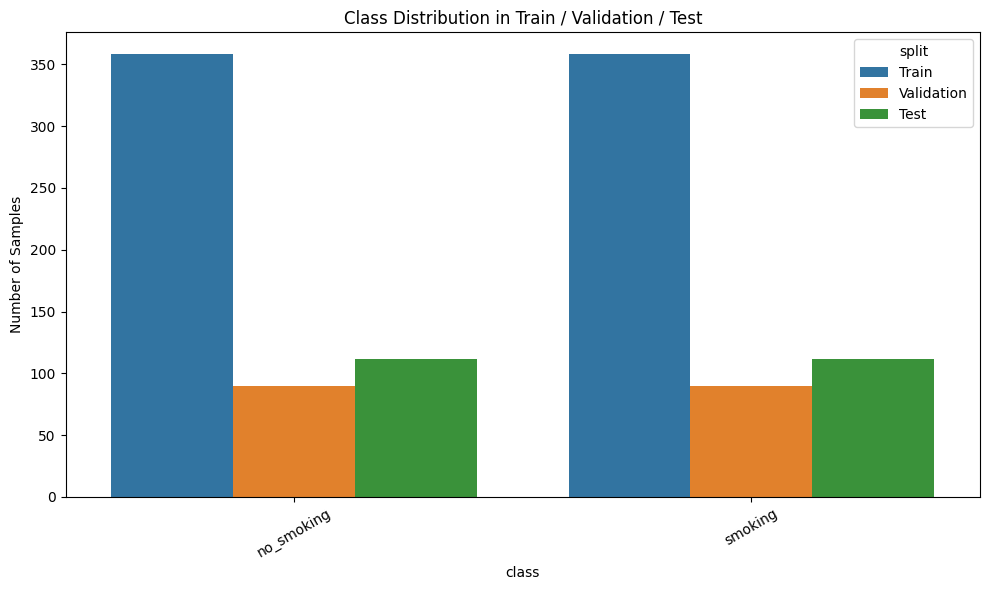

In [15]:
# Make sure directory exists
os.makedirs("../reports/figures", exist_ok=True)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="class", y="count", hue="split")
plt.title("Class Distribution in Train / Validation / Test")
plt.ylabel("Number of Samples")
plt.xticks(rotation=30)
plt.tight_layout()

# Save the figure
plt.savefig("../reports/figures/class_distribution.png", dpi=300)
plt.show()

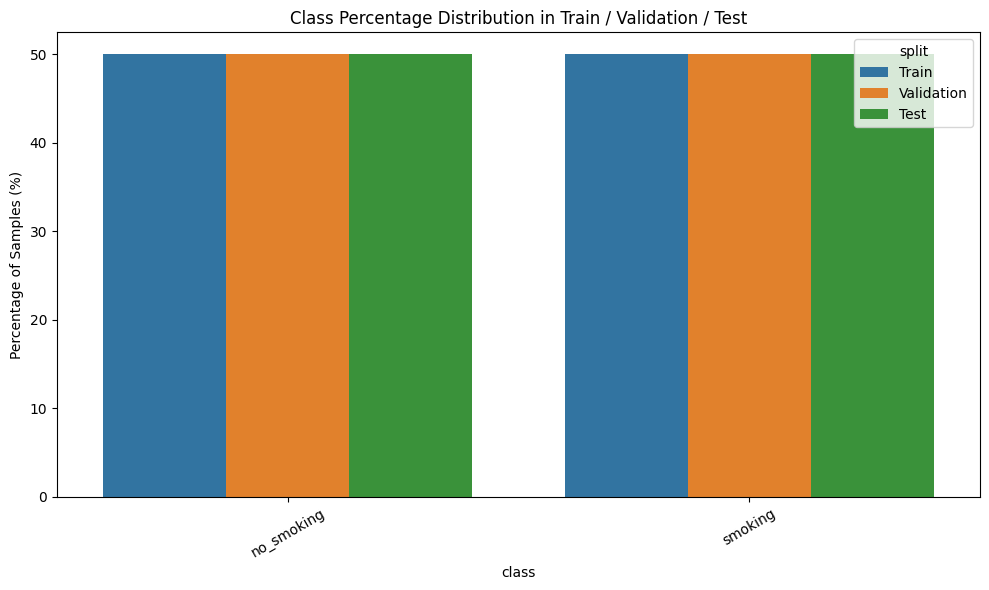

In [17]:
df_pct = df.copy()
df_pct["percent"] = df_pct.groupby("split")["count"].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,6))
sns.barplot(data=df_pct, x="class", y="percent", hue="split")
plt.title("Class Percentage Distribution in Train / Validation / Test")
plt.ylabel("Percentage of Samples (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("../reports/figures/class_distribution_percentage.png", dpi=300)
plt.show()


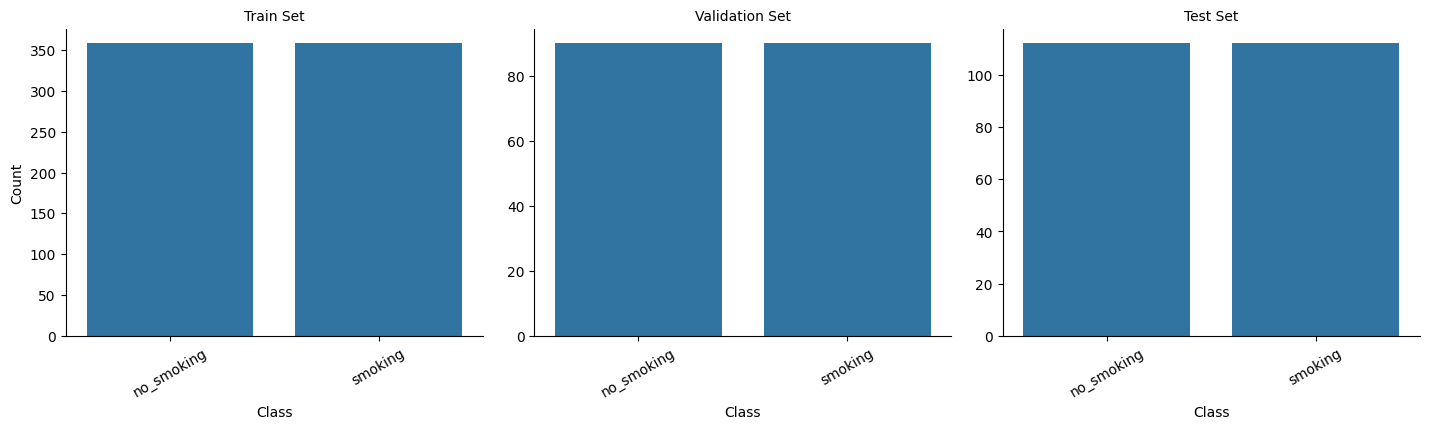

In [18]:
g = sns.catplot(
    data=df,
    x="class", y="count",
    col="split",
    kind="bar",
    col_wrap=3,  # 3 plots in a row
    sharey=False,  # each dataset has its own y-scale
    height=4, aspect=1.2
)

g.set_titles("{col_name} Set")
g.set_axis_labels("Class", "Count")
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(30)

plt.savefig("../reports/figures/class_distribution_facets.png", dpi=300)
plt.show()


## Characteristics distribution

## Performance analysis
Esto igual mejor en un notebook distinto?